In [10]:
# auto-reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%reload_ext autoreload

In [38]:
# define paths
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'
P_PATH = r'D:\v1_v4_1024'
REPO_PATH =  r'C:\Users\Andre\projects\v1_v4_1024_elec'


# settings
import pandas as pd
import numpy as np
import os

# custom
import sys
sys.path.append(REPO_PATH)
from scripts.hierarchical_bootstrap import *


In [39]:
N_ARRAYS = 16

In [40]:
# prep data for hierarchical bootstrap - first session only for now (until we download all sessions)
# levels: subject, array, channels
# load results
df = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_spectral_params.csv", index_col=0) # load LFP spectral parameter results
# select feature
feature = 'exponent'
# add subject column
df['subject'] = df['session'].str[0]
# seperate conditions (pre/post)
df_0 = df[df['epoch'] == 'pre']
df_1 = df[df['epoch'] == 'post']
# create each array
data_0 = np.zeros((len(df_0['subject'].unique()), N_ARRAYS, len(df_0['channel'].unique())))
data_1 = np.zeros((len(df_1['subject'].unique()), N_ARRAYS, len(df_1['channel'].unique())))
print(f"Shape of data_0: {data_0.shape}")
# fill arrays
for i, subject in enumerate(df_0['subject'].unique()):
    for j, array in enumerate(df_0[df_0['subject'] == subject]['array'].unique()):
        for k, channel in enumerate(df_0[(df_0['subject'] == subject) & (df_0['array'] == array)]['channel'].unique()):
            data_0[i, j, k] = df_0.loc[(df_0['subject'] == subject) & (df_0['array'] == array) & (df_0['channel'] == channel), feature].values[0]
            data_1[i, j, k] = df_1.loc[(df_1['subject'] == subject) & (df_1['array'] == array) & (df_1['channel'] == channel), feature].values[0]



Shape of data_0: (2, 16, 64)


In [41]:
data_1

array([[[4.40963853, 4.44836043, 4.07909891, ..., 4.33302509,
         4.31273931, 4.27415148],
        [2.97836377, 3.09180157, 3.09982202, ..., 3.2591436 ,
         3.22779444, 3.45366507],
        [3.20475697, 3.40760665, 3.35828031, ..., 3.38290146,
         3.80011177, 3.90502096],
        ...,
        [3.68503528, 3.89982226, 3.63991282, ..., 4.01128959,
         4.12060458, 4.130932  ],
        [3.02265248, 3.9048937 , 3.53176189, ..., 3.5473545 ,
         3.29133166, 4.17239748],
        [4.00292091, 4.0559549 , 3.78828789, ..., 3.43308937,
         3.19696361, 3.15331513]],

       [[2.61013182, 2.54468349, 2.35309109, ..., 2.83595273,
         2.86130174, 2.97681639],
        [3.49558692, 3.38770066, 3.409769  , ..., 3.08357719,
         3.13191931, 3.18468552],
        [3.31698808, 3.61563549, 3.23366095, ..., 3.64644236,
         3.66953926, 3.66118757],
        ...,
        [2.77315259, 2.7060987 , 2.67667934, ..., 2.88691468,
         2.61526293, 2.42676391],
        [3.7


p-value: 1.000


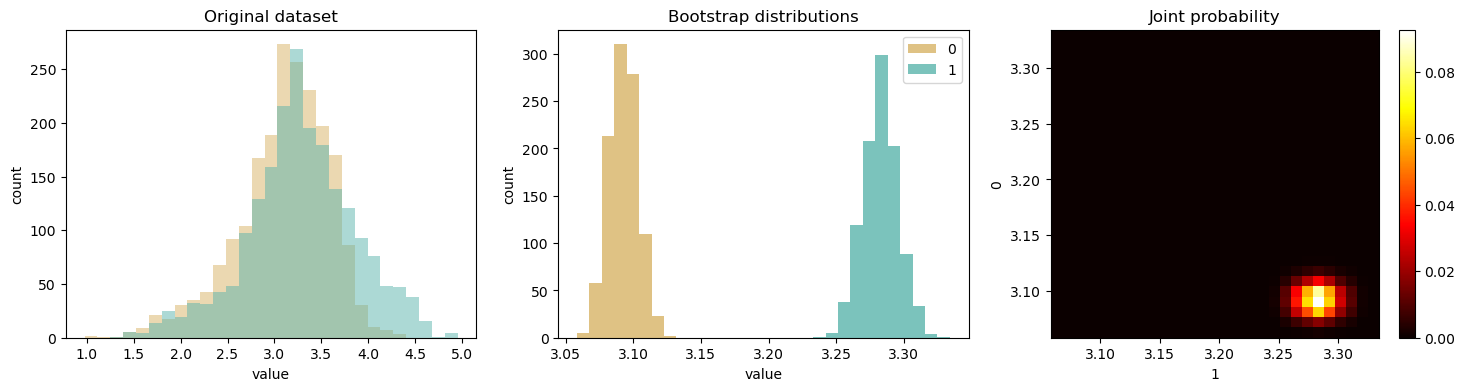

(1.0,
 array([3.10461551, 3.08458001, 3.08490321, 3.0943345 , 3.07329983,
        3.08171166, 3.08720272, 3.0944258 , 3.08435506, 3.10964412,
        3.10419179, 3.10182092, 3.10042367, 3.09571842, 3.12460954,
        3.10408262, 3.09338847, 3.11009398, 3.08457899, 3.08640131,
        3.09861755, 3.07384051, 3.10078472, 3.08164687, 3.06965012,
        3.08590611, 3.08129576, 3.09541818, 3.08221727, 3.08500424,
        3.09062014, 3.09338602, 3.08866947, 3.09187524, 3.08420078,
        3.08789712, 3.09703833, 3.10900949, 3.06821713, 3.10910231,
        3.09840125, 3.11253686, 3.07206541, 3.08322172, 3.1116484 ,
        3.08474464, 3.08875572, 3.08511198, 3.09232529, 3.07514276,
        3.08618994, 3.08754982, 3.09613533, 3.08230683, 3.10725676,
        3.09390617, 3.09606372, 3.07342517, 3.09333621, 3.08998367,
        3.10397439, 3.08016761, 3.07764503, 3.07643868, 3.09751633,
        3.1130088 , 3.11597148, 3.07355127, 3.07536847, 3.08277001,
        3.10310591, 3.08019004, 3.09958955

In [46]:
hierarchical_bootstrap(data_0, data_1)

In [50]:
def multivar_hierarchical_bootstrap(df, vars, fname_out=None, n_iter=1000, verbose=True, plot=True):
    """
    Prepares data and performs hierarchical bootstrap for an array of variables testing whether the
    means of two distributions are significantly different for each variable.

     Parameters
    ----------
    df : DataFrame
        Containing LFP spectral parameter results.
    vars: list
        Variables that will be measured.
    n_iter : int
        Number of iterations for the bootstrap.
    verbose : bool
        Whether to print the p-value.
    plot : bool
        Whether to plot the results.
    fname_out : str, optional
        Path to save figure to. If None, figure is not saved.

     Returns
    -------
    p_value : float
        p-value for the hierarchical bootstrap.
    distribution_0, distribution_1 : array
        Arrays containing the resampled means of each data array.
    bin_edges : array
        Array containing the bin edges for the joint probability matrix.
    joint_prob : array
        Array containing the joint probability matrix.
    """
    for v in vars:
        print(f"Analyzing: \t{v}")

        # add subject column
        df['subject'] = df['session'].str[0]

        # seperate conditions (pre/post)
        df_0 = df[df['epoch'] == 'pre']
        df_1 = df[df['epoch'] == 'post']

        # create each array
        data_0 = np.zeros((len(df_0['subject'].unique()), N_ARRAYS, len(df_0['channel'].unique())))
        data_1 = np.zeros((len(df_1['subject'].unique()), N_ARRAYS, len(df_1['channel'].unique())))


        # fill arrays
        for i, subject in enumerate(df_0['subject'].unique()):
            for j, array in enumerate(df_0[df_0['subject'] == subject]['array'].unique()):
                for k, channel in enumerate(df_0[(df_0['subject'] == subject) & (df_0['array'] == array)]['channel'].unique()):
                    data_0[i, j, k] = df_0.loc[(df_0['subject'] == subject) & (df_0['array'] == array) & (df_0['channel'] == channel), v].values[0]
                    data_1[i, j, k] = df_1.loc[(df_1['subject'] == subject) & (df_1['array'] == array) & (df_1['channel'] == channel), v].values[0]
        
        # perform hierarchical bootstrap
        if not fname_out is None:
            hierarchical_bootstrap(data_0=data_0, data_1=data_1, fname_out=f'{fname_out}/{v}_boot_distribution.png')


Analyzing: 	exponent

p-value: 1.000


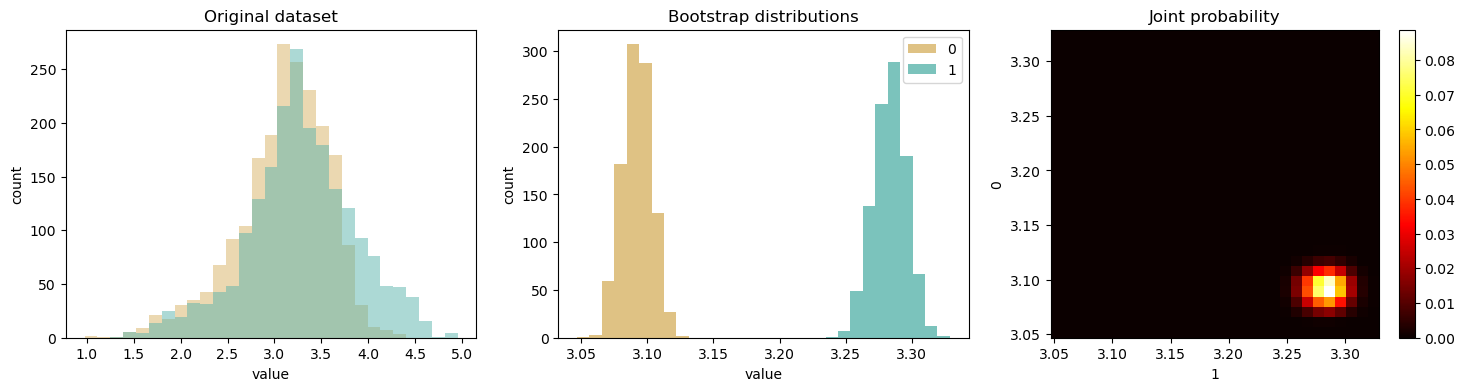

Analyzing: 	knee

p-value: 1.000


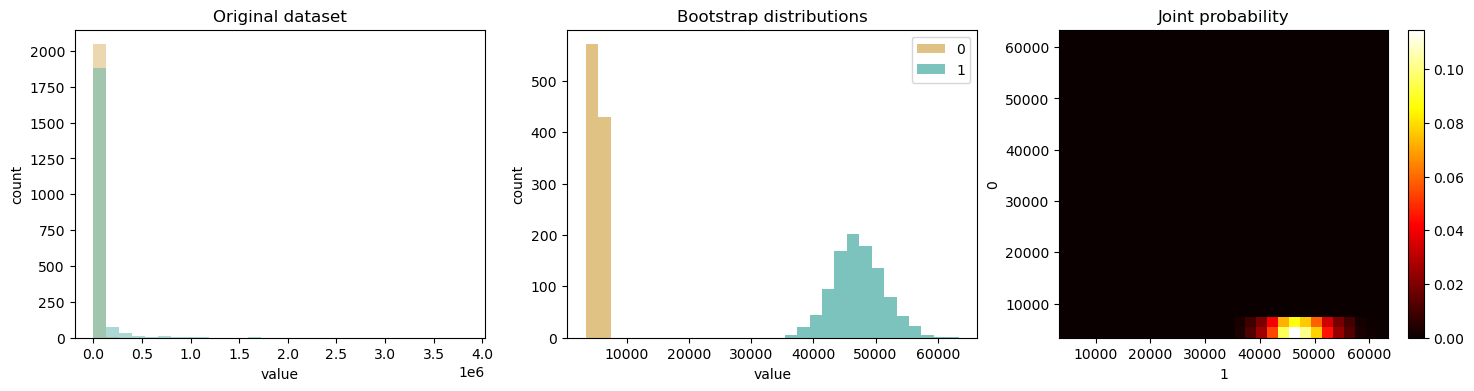

Analyzing: 	offset

p-value: 1.000


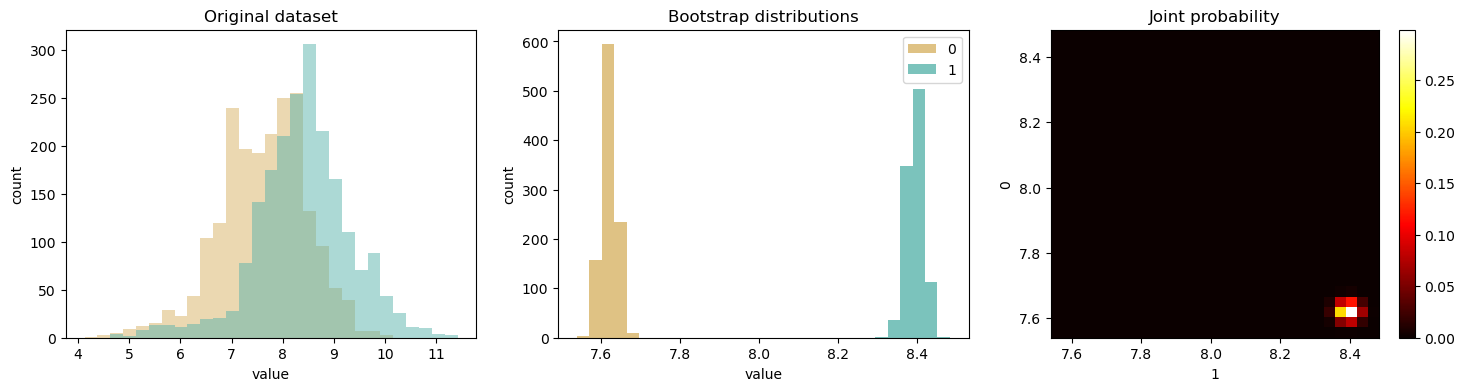

In [51]:
vars = ['exponent', 'knee', 'offset']
df = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_spectral_params.csv", index_col=0) # load LFP spectral parameter results


multivar_hierarchical_bootstrap(df, vars, fname_out=f'{P_PATH}/figures/hierarchical_bootstrap')